
Rate of neuron stimulated with current input: 0.00 spikes/s
Rate of neuron stimulated with Poissonian spike trains: 16.67 spikes/s


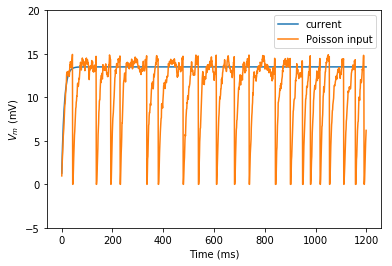

In [1]:
# global imports
import matplotlib.pyplot as plt

%matplotlib inline

# import simulator
import nest

T = 1200. # (ms)
I_ext = 0. # (pA)
nu_ext = 14000. # (Hz)
J = 0.1 # (mV)
d = .1 # (ms)

# Threshold
#I_ext = 375
# Subthreshold
I_ext = 0.9*375
# Superthreshold
#I_ext = 1.1*375


neuron_params = {
    'C_m': 250.0, # (pF)
    'E_L': 0., # (mV)
    'I_e': 0.0, # (pA)
    'V_m': 0., # (mV)
    'V_reset': 0., # (mV)
    'V_th': 15., # (mV)
    't_ref': 2.0, # (ms)
    'tau_m': 10.0, # (ms)
}

nest.ResetKernel()

# set default neuron parameters
nest.SetDefaults('iaf_psc_delta', neuron_params)

# create neuron which receives constant current
neuron1 = nest.Create('iaf_psc_delta')
nest.SetStatus(neuron1, {'I_e': I_ext})

# create multimeter to record membrane potential of neuron1
multimeter1 = nest.Create('multimeter')
nest.SetStatus(multimeter1, {'record_from': ['V_m']})
nest.Connect(multimeter1, neuron1)

# create spike detector to record spikes of neuron1
spikedetector1 = nest.Create('spike_detector')
nest.SetStatus(spikedetector1, [{'withtime': True,
                                 'withgid': True,
                                 'to_file': False}])
nest.Connect(neuron1, spikedetector1)

# create neuron which receives Poissonian spike trains
neuron2 = nest.Create('iaf_psc_delta')
pgen = nest.Create('poisson_generator')
nest.SetStatus(pgen, {'rate': nu_ext})
syn_dic = {'weight': J, 'delay': d}
nest.Connect([pgen[0]], [neuron2[0]], 'one_to_one', syn_dic)

# create multimeter to record membrane potential of neuron2
multimeter2 = nest.Create('multimeter')
nest.SetStatus(multimeter2, {'record_from': ['V_m']})
nest.Connect(multimeter2, neuron2)

# create spike detector to record spikes of neuron2
spikedetector2 = nest.Create('spike_detector')
nest.SetStatus(spikedetector2, [{'withtime': True,
                                 'withgid': True,
                                 'to_file': False}])
nest.Connect(neuron2, spikedetector2)

# start simulation
nest.Simulate(T)

# get data for neuron1
data1 = nest.GetStatus(multimeter1)[0]['events']
v_mem1 = data1['V_m']
times1 = data1['times']
spikes1 = nest.GetStatus(spikedetector1)[0]['events']['times']
rate1 = float(len(spikes1))/T*1e3
print('\nRate of neuron stimulated with current input: %.2f spikes/s'%(rate1))

# get data for neuron2
data2 = nest.GetStatus(multimeter2)[0]['events']
v_mem2 = data2['V_m']
times2 = data2['times']
spikes2 = nest.GetStatus(spikedetector2)[0]['events']['times']
rate2 = float(len(spikes2))/T*1e3
print('Rate of neuron stimulated with Poissonian spike trains: %.2f spikes/s'%(rate2))

# plot results
plt.plot(times1, v_mem1, label='current')
plt.plot(times2, v_mem2, label='Poisson input')
plt.xlabel('Time (ms)')
plt.ylabel(r'$V_m$ (mV)')
#plt.xlim([0., T])
plt.ylim([-5., 20.])
plt.legend()


Simulate for external rate of 0 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 4.87 s
Simulation time   : 4.29 s
Ex Rate           : 0.00 Hz
In Rate           : 0.00 Hz
Simulate for external rate of 1000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 4.74 s
Simulation time   : 17.63 s
Ex Rate           : 0.00 Hz
In Rate           : 0.00 Hz
Simulate for external rate of 2000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 4.17 s
Simulation time   : 17.59 s
Ex Rate           : 0.00 Hz
In Rate           : 0.00 Hz
Simulate for external rate of 3000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Bui

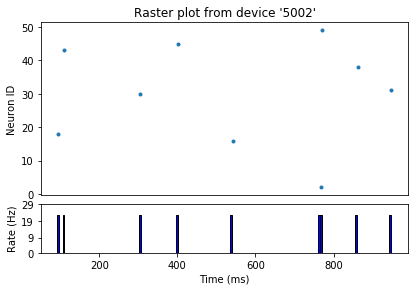

Simulate for external rate of 13000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 4.10 s
Simulation time   : 24.06 s
Ex Rate           : 3.20 Hz
In Rate           : 3.10 Hz


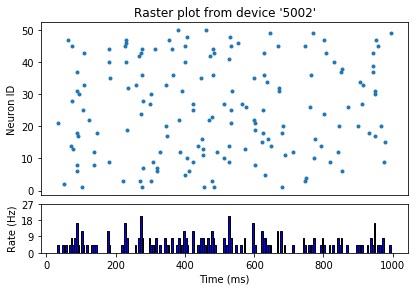

Simulate for external rate of 14000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 4.09 s
Simulation time   : 25.49 s
Ex Rate           : 8.22 Hz
In Rate           : 8.08 Hz


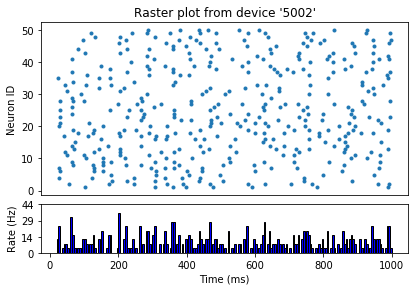

Simulate for external rate of 15000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 4.11 s
Simulation time   : 27.44 s
Ex Rate           : 12.14 Hz
In Rate           : 12.60 Hz


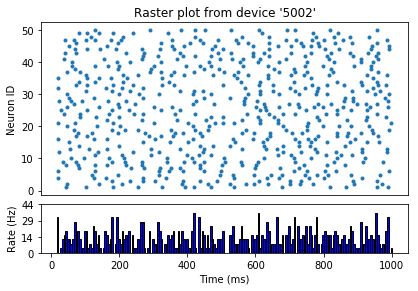

Simulate for external rate of 16000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 4.14 s
Simulation time   : 30.07 s
Ex Rate           : 16.38 Hz
In Rate           : 16.54 Hz


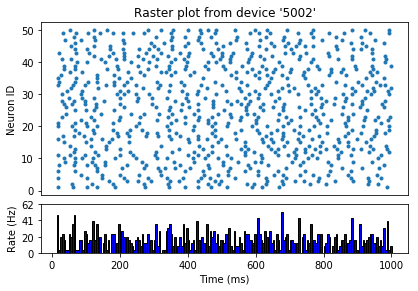

Simulate for external rate of 17000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 4.23 s
Simulation time   : 29.63 s
Ex Rate           : 20.52 Hz
In Rate           : 20.18 Hz


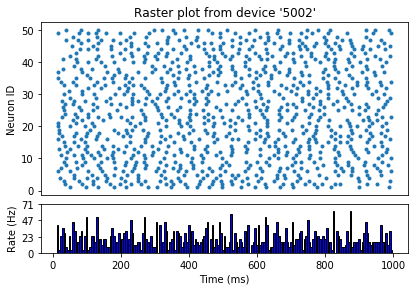

Simulate for external rate of 18000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 4.05 s
Simulation time   : 29.00 s
Ex Rate           : 23.76 Hz
In Rate           : 24.10 Hz


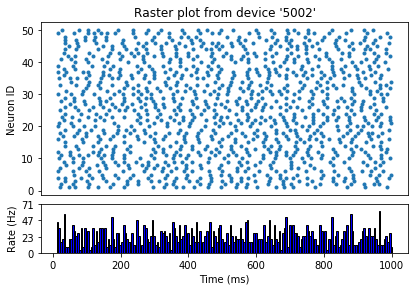

Simulate for external rate of 19000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 4.76 s
Simulation time   : 32.45 s
Ex Rate           : 27.00 Hz
In Rate           : 27.26 Hz


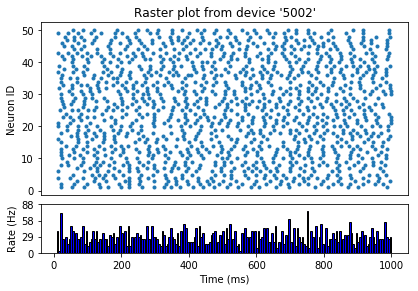

Simulate for external rate of 20000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 4.15 s
Simulation time   : 32.28 s
Ex Rate           : 29.74 Hz
In Rate           : 30.90 Hz


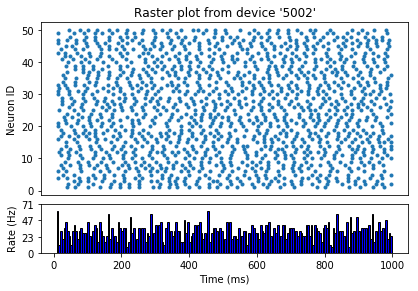

Simulate for external rate of 21000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 4.04 s
Simulation time   : 46.94 s
Ex Rate           : 33.32 Hz
In Rate           : 33.80 Hz


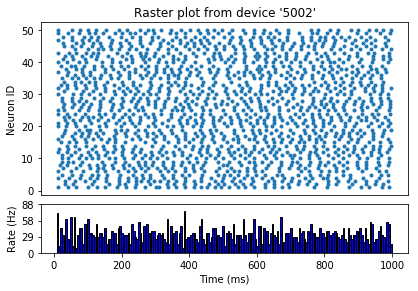

Simulate for external rate of 22000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 3.99 s
Simulation time   : 34.12 s
Ex Rate           : 36.36 Hz
In Rate           : 36.66 Hz


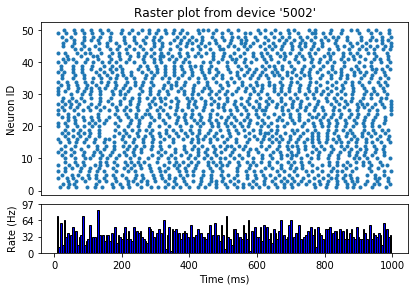

Simulate for external rate of 23000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 4.14 s
Simulation time   : 36.87 s
Ex Rate           : 39.26 Hz
In Rate           : 39.74 Hz


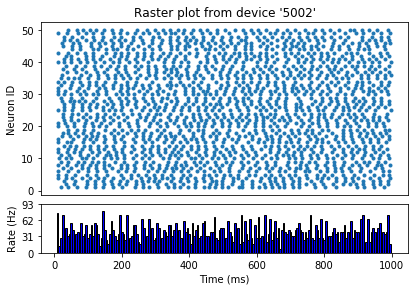

Simulate for external rate of 24000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 4.17 s
Simulation time   : 36.36 s
Ex Rate           : 42.10 Hz
In Rate           : 42.36 Hz


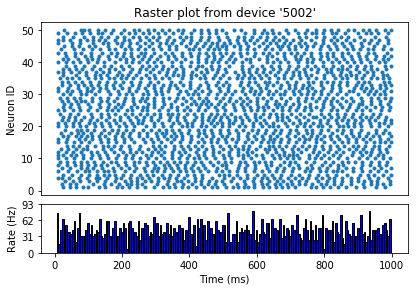

Simulate for external rate of 25000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 3.92 s
Simulation time   : 34.47 s
Ex Rate           : 44.66 Hz
In Rate           : 45.54 Hz


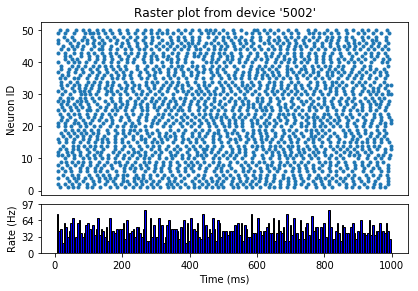

Simulate for external rate of 26000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 4.38 s
Simulation time   : 38.72 s
Ex Rate           : 47.88 Hz
In Rate           : 48.30 Hz


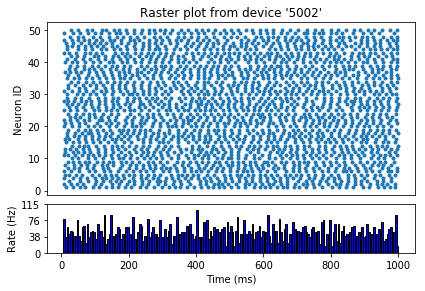

Simulate for external rate of 27000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 4.06 s
Simulation time   : 39.64 s
Ex Rate           : 50.54 Hz
In Rate           : 51.04 Hz


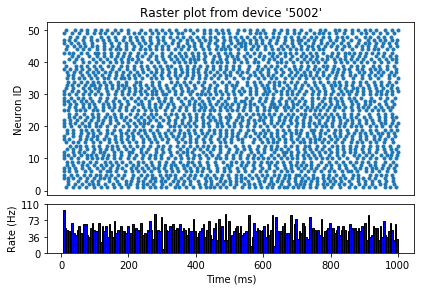

Simulate for external rate of 28000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 3.93 s
Simulation time   : 41.17 s
Ex Rate           : 53.30 Hz
In Rate           : 53.70 Hz


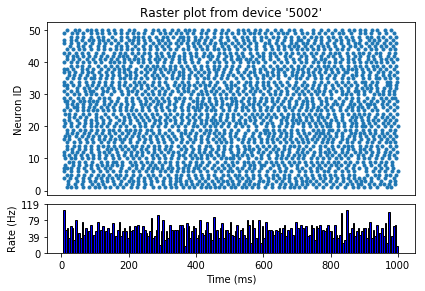

Simulate for external rate of 29000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 3.96 s
Simulation time   : 43.03 s
Ex Rate           : 56.16 Hz
In Rate           : 56.40 Hz


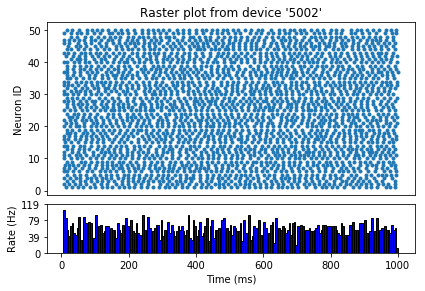

Simulate for external rate of 30000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 6.74 s
Simulation time   : 44.85 s
Ex Rate           : 58.94 Hz
In Rate           : 59.16 Hz


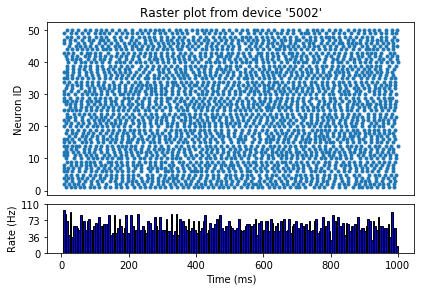

Simulate for external rate of 31000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 4.50 s
Simulation time   : 40.44 s
Ex Rate           : 61.42 Hz
In Rate           : 61.50 Hz


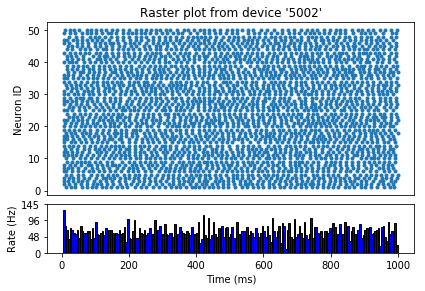

Simulate for external rate of 32000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 4.07 s
Simulation time   : 41.37 s
Ex Rate           : 63.88 Hz
In Rate           : 64.38 Hz


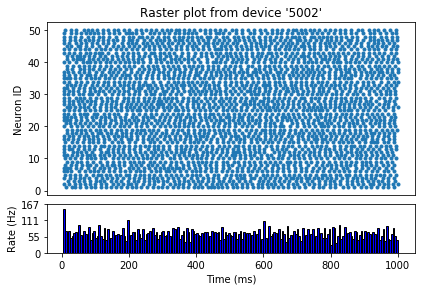

Simulate for external rate of 33000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 3.95 s
Simulation time   : 47.13 s
Ex Rate           : 66.52 Hz
In Rate           : 66.90 Hz


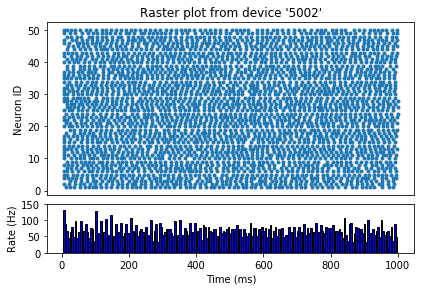

Simulate for external rate of 34000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 5.22 s
Simulation time   : 46.26 s
Ex Rate           : 69.32 Hz
In Rate           : 69.54 Hz


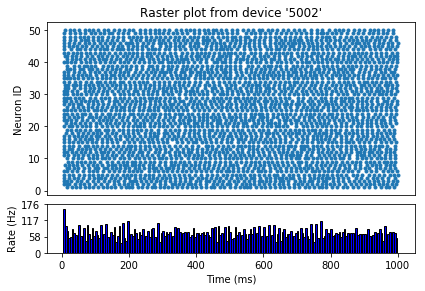

Simulate for external rate of 35000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 3.99 s
Simulation time   : 42.79 s
Ex Rate           : 72.10 Hz
In Rate           : 72.48 Hz


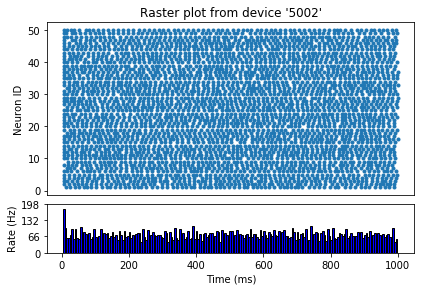

Simulate for external rate of 36000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 3.97 s
Simulation time   : 43.51 s
Ex Rate           : 74.52 Hz
In Rate           : 74.78 Hz


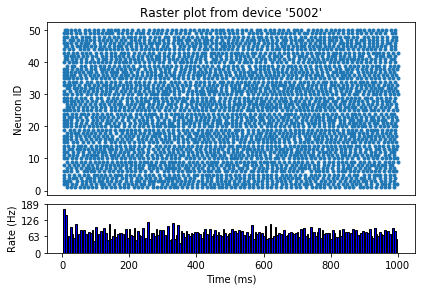

Simulate for external rate of 37000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 3.95 s
Simulation time   : 45.80 s
Ex Rate           : 77.34 Hz
In Rate           : 77.12 Hz


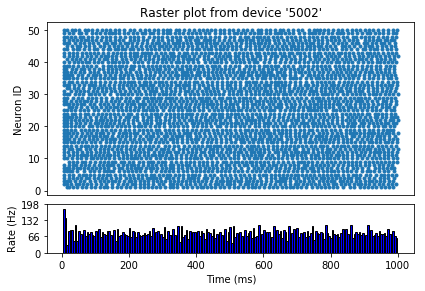

Simulate for external rate of 38000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 4.11 s
Simulation time   : 51.37 s
Ex Rate           : 79.40 Hz
In Rate           : 79.66 Hz


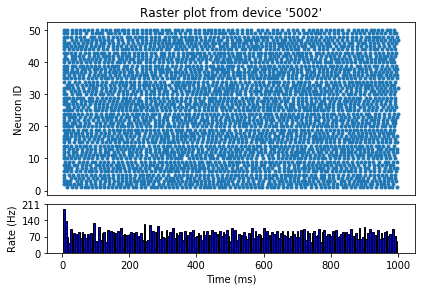

Simulate for external rate of 39000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 4.12 s
Simulation time   : 51.38 s
Ex Rate           : 82.16 Hz
In Rate           : 82.22 Hz


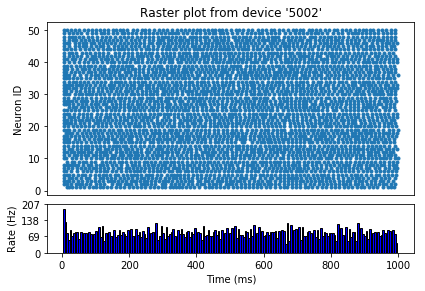

Simulate for external rate of 40000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 3.99 s
Simulation time   : 53.51 s
Ex Rate           : 84.24 Hz
In Rate           : 84.22 Hz


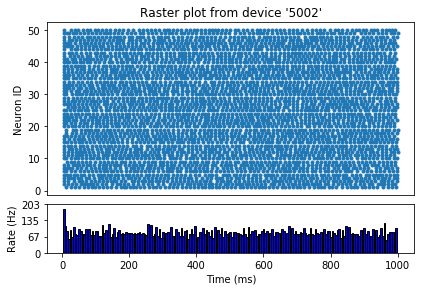

Simulate for external rate of 41000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 4.15 s
Simulation time   : 53.44 s
Ex Rate           : 87.02 Hz
In Rate           : 87.04 Hz


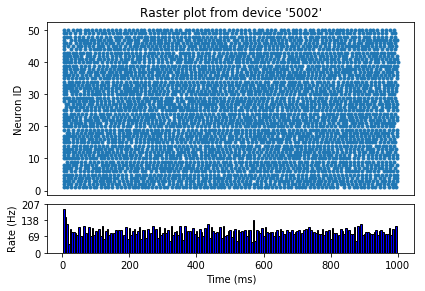

Simulate for external rate of 42000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 4.10 s
Simulation time   : 61.73 s
Ex Rate           : 89.20 Hz
In Rate           : 89.42 Hz


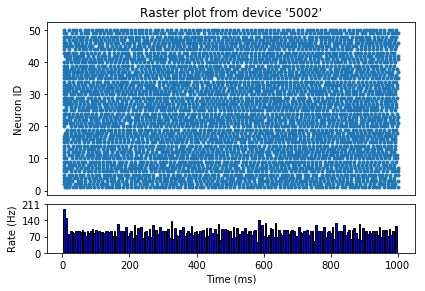

Simulate for external rate of 43000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 4.26 s
Simulation time   : 53.47 s
Ex Rate           : 91.50 Hz
In Rate           : 92.22 Hz


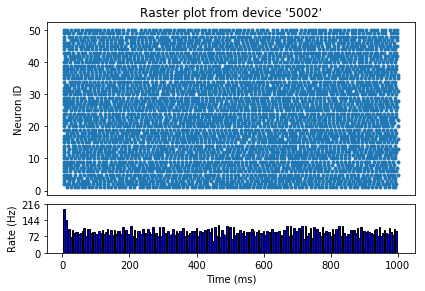

Simulate for external rate of 44000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 4.26 s
Simulation time   : 56.64 s
Ex Rate           : 94.22 Hz
In Rate           : 94.18 Hz


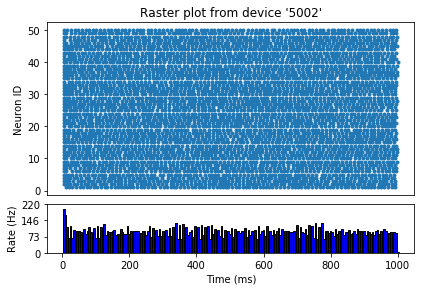

Simulate for external rate of 45000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 4.15 s
Simulation time   : 60.54 s
Ex Rate           : 96.68 Hz
In Rate           : 96.50 Hz


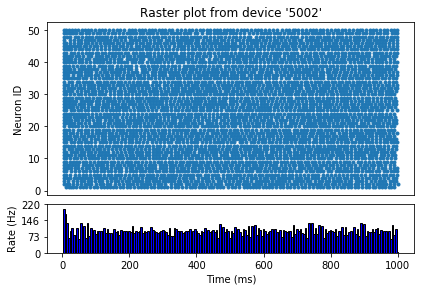

Simulate for external rate of 46000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 4.95 s
Simulation time   : 57.92 s
Ex Rate           : 99.16 Hz
In Rate           : 98.84 Hz


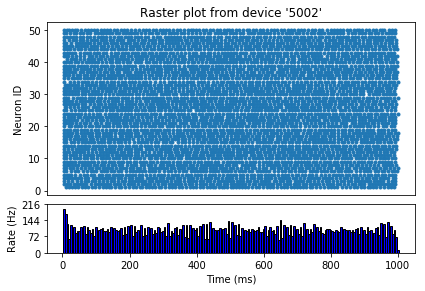

Simulate for external rate of 47000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 4.24 s
Simulation time   : 66.88 s
Ex Rate           : 101.04 Hz
In Rate           : 101.70 Hz


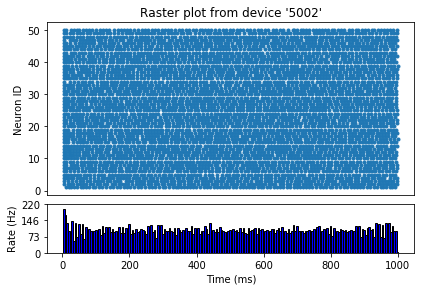

Simulate for external rate of 48000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 4.96 s
Simulation time   : 67.05 s
Ex Rate           : 103.42 Hz
In Rate           : 103.90 Hz


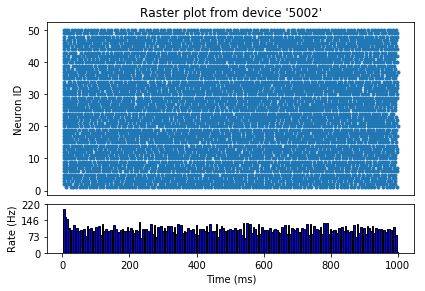

Simulate for external rate of 49000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 4.32 s
Simulation time   : 67.66 s
Ex Rate           : 106.26 Hz
In Rate           : 106.46 Hz


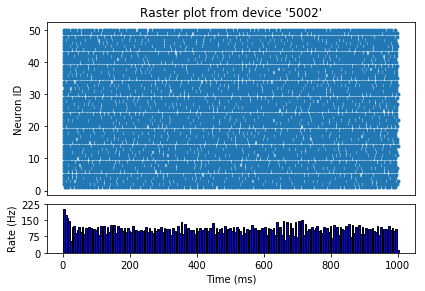

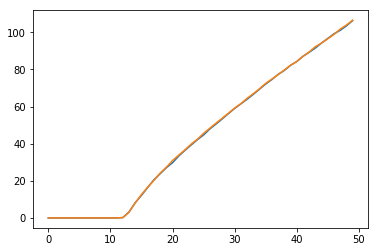

In [8]:
# global imports
import time
import matplotlib.pylab as plt

# local imports
from ex1_parameters import *

# import simulator
import nest
import nest.raster_plot

rates_ex = []
rates_in = []

for nu_ext in range(0, 50000, 1000):
    
    print("Simulate for external rate of {} Hz".format(nu_ext))
    
    nest.ResetKernel()
    
    nu_ext = float(nu_ext)

    startbuild = time.time()

    # Set time resolution of the simulation
    nest.SetKernelStatus({'resolution': dt, 'print_time': True})

    ### CREATE NETWORK NODES ###
    print('Building network')

    # Set neuron parameters
    nest.SetDefaults('iaf_psc_delta', neuron_params)

    # Create neurons
    nodes_ex=nest.Create('iaf_psc_delta', NE)
    nodes_in=nest.Create('iaf_psc_delta', NI)

    # Create poisson generator
    noise = nest.Create('poisson_generator',params={'rate':nu_ext})

    # Create spike detectors
    espikes=nest.Create('spike_detector')
    ispikes=nest.Create('spike_detector')
    nest.SetStatus(espikes,[{'withtime': True,
                            'withgid': True,
                            'to_file': False}])
    nest.SetStatus(ispikes,[{'withtime': True,
                             'withgid': True,
                             'to_file': False}])

    # Define synapse dictionaries
    syn_exc = {'weight': J, 'delay': d}
    syn_inh = {'weight': -g*J, 'delay': d}

    ### CONNECT NETWORK ###
    print('Connecting network')

    # Connect noise
    nest.Connect(noise,nodes_ex, 'all_to_all', syn_exc)
    nest.Connect(noise,nodes_in, 'all_to_all', syn_exc)

    # Connect spike detector
    nest.Connect(nodes_ex[:N_rec], espikes, 'all_to_all')
    nest.Connect(nodes_in[:N_rec], ispikes, 'all_to_all')                  

    # Connect excitatory neurons
    print('Excitatory connections')
    conn_exc = {'rule': 'fixed_indegree', 'indegree': CE}
    nest.Connect(nodes_ex, nodes_ex, conn_exc, syn_exc)
    nest.Connect(nodes_ex, nodes_in, conn_exc, syn_exc)

    # Connect inhibitry neurons
    print('Inhibitory connections')
    conn_inh = {'rule': 'fixed_indegree', 'indegree': CI}
    nest.Connect(nodes_in, nodes_ex, conn_inh, syn_inh)
    nest.Connect(nodes_in, nodes_in, conn_inh, syn_inh)

    endbuild=time.time()

    ### SIMULATE ###
    print('Simulating.')

    nest.Simulate(simtime)

    endsimulate= time.time()

    ### NETWORK EVALUATION ###

    build_time = endbuild-startbuild
    sim_time   = endsimulate-endbuild
    events_ex = nest.GetStatus(espikes,'n_events')[0]
    rate_ex   = events_ex/simtime*1000.0/N_rec
    rates_ex.append(rate_ex)
    events_in = nest.GetStatus(ispikes,'n_events')[0]
    rate_in   = events_in/simtime*1000.0/N_rec
    rates_in.append(rate_in)
    
    print('Brunel network simulation (Python)')
    print('Building time     : %.2f s' % build_time)
    print('Simulation time   : %.2f s' % sim_time)
    print('Ex Rate           : %.2f Hz' % rate_ex)
    print('In Rate           : %.2f Hz' % rate_in)

    if rate_ex > 0:
        # Show raster plot 
        nest.raster_plot.from_device(espikes, hist=True)
        plt.show()


plt.plot(rates_ex)
plt.plot(rates_in)




Simulate for external rate of 0 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.10 s
Simulation time   : 4.28 s
Ex Rate           : 0.00 Hz
In Rate           : 0.00 Hz
Simulate for external rate of 1000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.05 s
Simulation time   : 17.46 s
Ex Rate           : 0.00 Hz
In Rate           : 0.00 Hz
Simulate for external rate of 2000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.04 s
Simulation time   : 17.84 s
Ex Rate           : 0.00 Hz
In Rate           : 0.00 Hz
Simulate for external rate of 3000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Bui

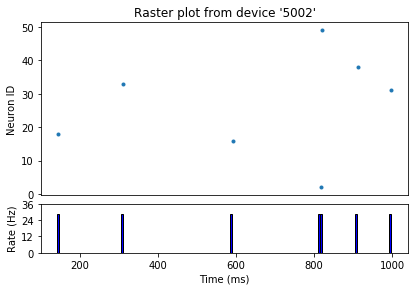

Simulate for external rate of 13000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.03 s
Simulation time   : 19.21 s
Ex Rate           : 3.78 Hz
In Rate           : 3.70 Hz


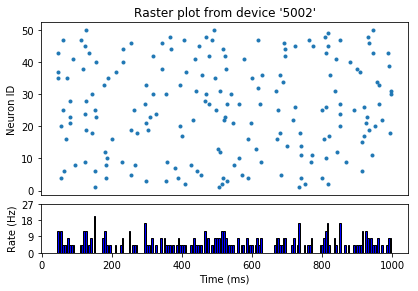

Simulate for external rate of 14000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.03 s
Simulation time   : 19.80 s
Ex Rate           : 15.00 Hz
In Rate           : 15.12 Hz


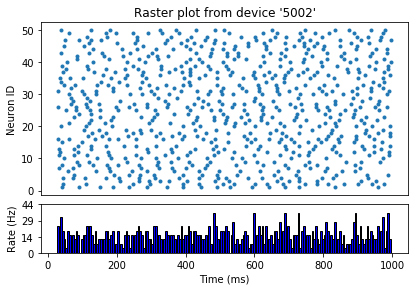

Simulate for external rate of 15000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.04 s
Simulation time   : 22.72 s
Ex Rate           : 26.50 Hz
In Rate           : 26.66 Hz


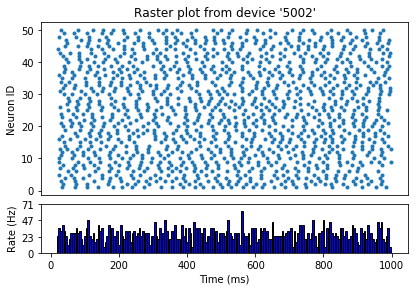

Simulate for external rate of 16000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.04 s
Simulation time   : 22.35 s
Ex Rate           : 35.72 Hz
In Rate           : 35.88 Hz


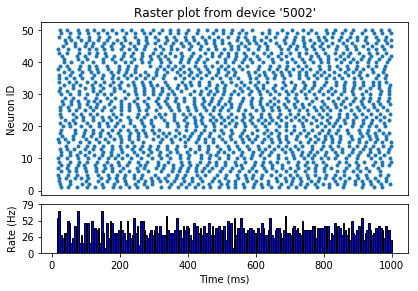

Simulate for external rate of 17000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.04 s
Simulation time   : 23.64 s
Ex Rate           : 43.46 Hz
In Rate           : 43.82 Hz


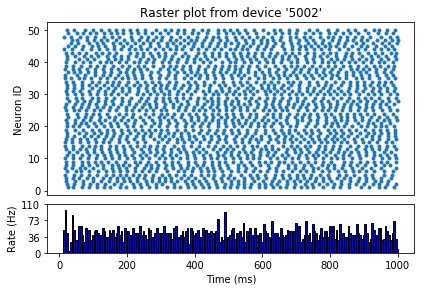

Simulate for external rate of 18000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.04 s
Simulation time   : 23.08 s
Ex Rate           : 50.54 Hz
In Rate           : 50.76 Hz


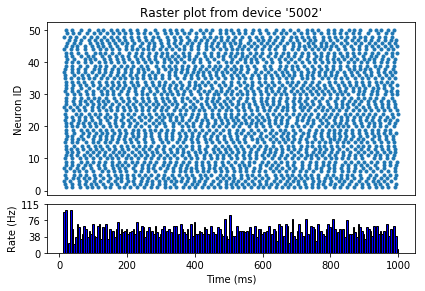

Simulate for external rate of 19000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.04 s
Simulation time   : 23.27 s
Ex Rate           : 56.94 Hz
In Rate           : 57.12 Hz


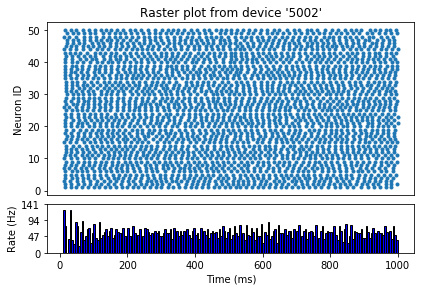

Simulate for external rate of 20000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.03 s
Simulation time   : 19.60 s
Ex Rate           : 62.94 Hz
In Rate           : 63.04 Hz


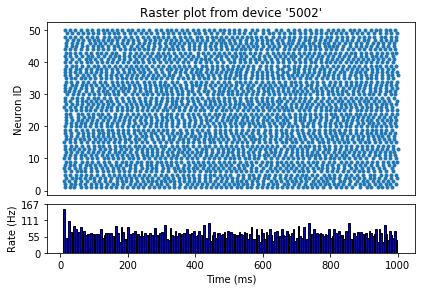

Simulate for external rate of 21000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.05 s
Simulation time   : 22.58 s
Ex Rate           : 68.56 Hz
In Rate           : 68.74 Hz


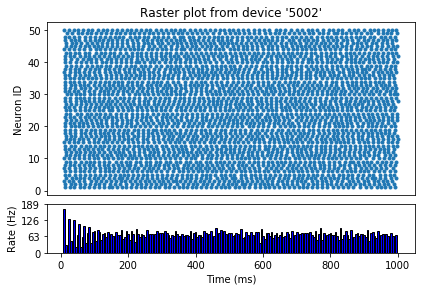

Simulate for external rate of 22000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.03 s
Simulation time   : 21.51 s
Ex Rate           : 73.82 Hz
In Rate           : 74.26 Hz


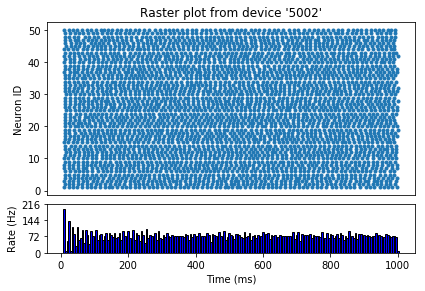

Simulate for external rate of 23000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.03 s
Simulation time   : 21.01 s
Ex Rate           : 79.24 Hz
In Rate           : 79.38 Hz


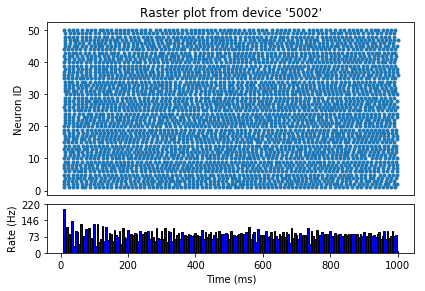

Simulate for external rate of 24000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.03 s
Simulation time   : 21.01 s
Ex Rate           : 84.30 Hz
In Rate           : 84.28 Hz


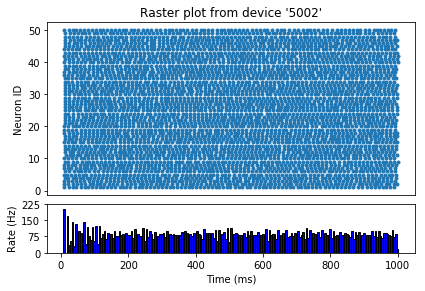

Simulate for external rate of 25000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.03 s
Simulation time   : 20.28 s
Ex Rate           : 89.04 Hz
In Rate           : 89.20 Hz


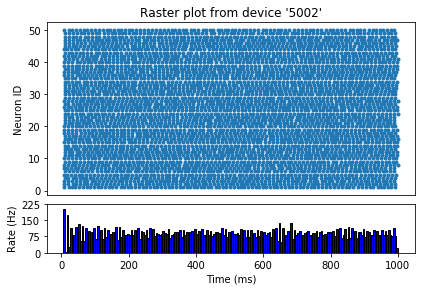

Simulate for external rate of 26000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.03 s
Simulation time   : 20.10 s
Ex Rate           : 93.76 Hz
In Rate           : 93.78 Hz


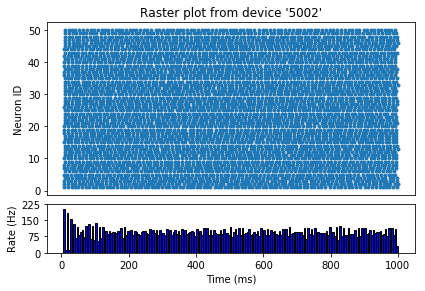

Simulate for external rate of 27000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.04 s
Simulation time   : 22.92 s
Ex Rate           : 98.16 Hz
In Rate           : 98.52 Hz


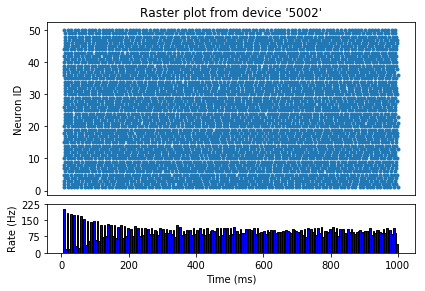

Simulate for external rate of 28000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.03 s
Simulation time   : 21.44 s
Ex Rate           : 102.54 Hz
In Rate           : 102.74 Hz


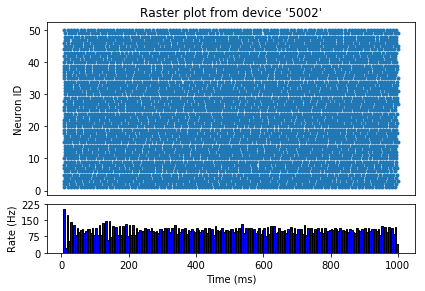

Simulate for external rate of 29000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.03 s
Simulation time   : 20.91 s
Ex Rate           : 106.96 Hz
In Rate           : 107.18 Hz


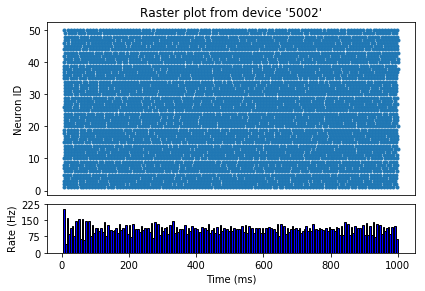

Simulate for external rate of 30000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.03 s
Simulation time   : 20.67 s
Ex Rate           : 111.00 Hz
In Rate           : 111.30 Hz


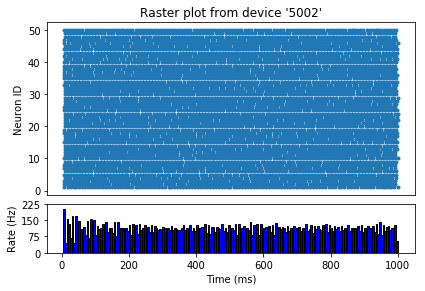

Simulate for external rate of 31000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.03 s
Simulation time   : 20.00 s
Ex Rate           : 115.12 Hz
In Rate           : 115.36 Hz


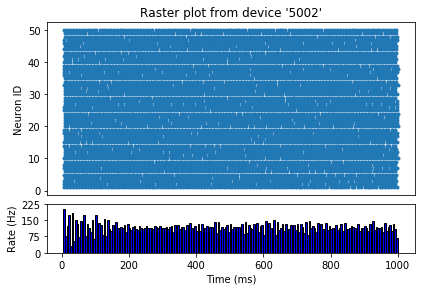

Simulate for external rate of 32000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.03 s
Simulation time   : 20.81 s
Ex Rate           : 119.08 Hz
In Rate           : 119.32 Hz


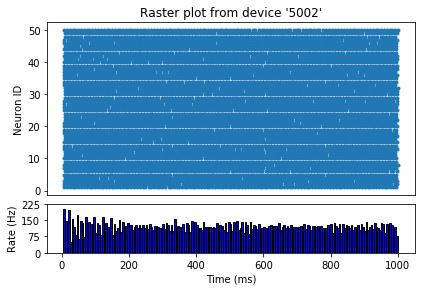

Simulate for external rate of 33000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.03 s
Simulation time   : 19.92 s
Ex Rate           : 122.96 Hz
In Rate           : 123.26 Hz


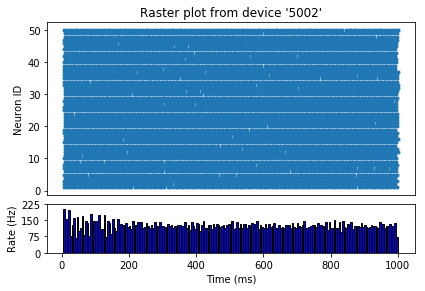

Simulate for external rate of 34000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.03 s
Simulation time   : 25.28 s
Ex Rate           : 126.80 Hz
In Rate           : 126.98 Hz


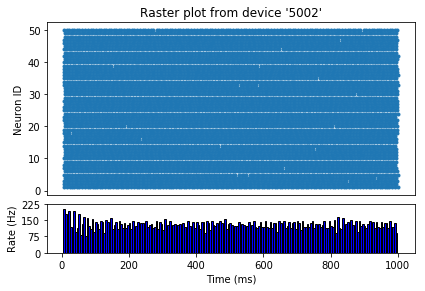

Simulate for external rate of 35000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.03 s
Simulation time   : 21.51 s
Ex Rate           : 130.48 Hz
In Rate           : 130.60 Hz


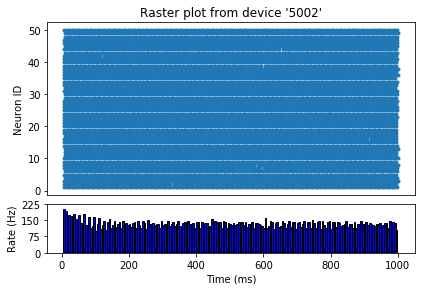

Simulate for external rate of 36000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.03 s
Simulation time   : 21.49 s
Ex Rate           : 134.12 Hz
In Rate           : 134.26 Hz


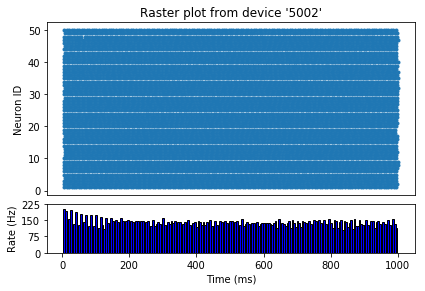

Simulate for external rate of 37000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.03 s
Simulation time   : 22.01 s
Ex Rate           : 137.68 Hz
In Rate           : 137.72 Hz


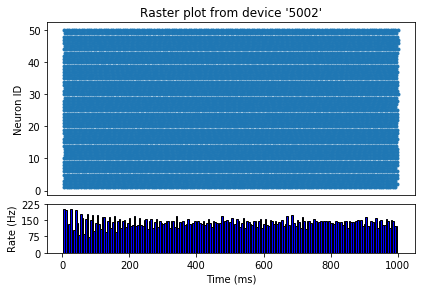

Simulate for external rate of 38000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.06 s
Simulation time   : 20.97 s
Ex Rate           : 141.20 Hz
In Rate           : 141.36 Hz


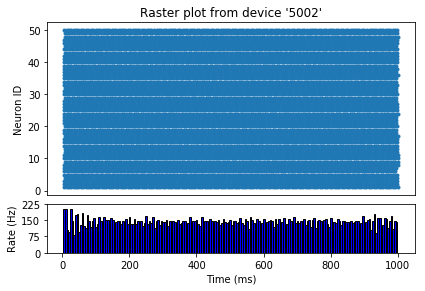

Simulate for external rate of 39000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.03 s
Simulation time   : 21.69 s
Ex Rate           : 144.48 Hz
In Rate           : 144.78 Hz


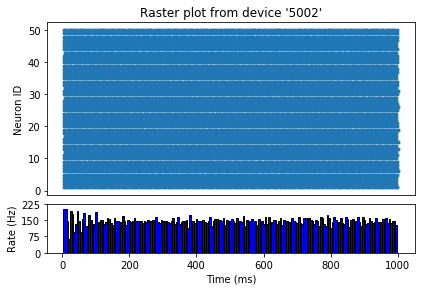

Simulate for external rate of 40000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.03 s
Simulation time   : 21.76 s
Ex Rate           : 147.78 Hz
In Rate           : 148.00 Hz


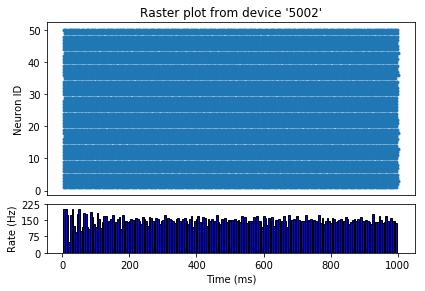

Simulate for external rate of 41000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.03 s
Simulation time   : 21.60 s
Ex Rate           : 151.16 Hz
In Rate           : 151.28 Hz


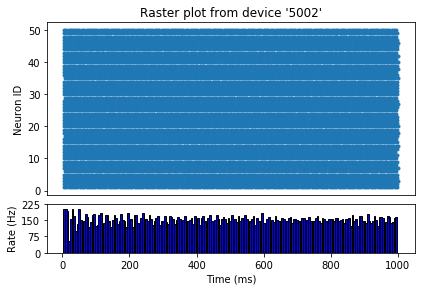

Simulate for external rate of 42000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.03 s
Simulation time   : 21.68 s
Ex Rate           : 154.34 Hz
In Rate           : 154.46 Hz


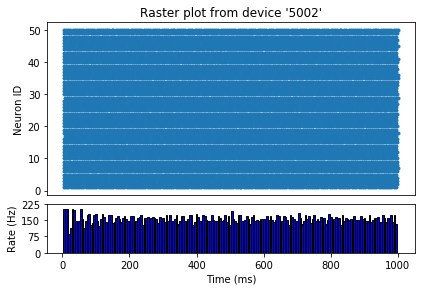

Simulate for external rate of 43000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.03 s
Simulation time   : 22.03 s
Ex Rate           : 157.46 Hz
In Rate           : 157.62 Hz


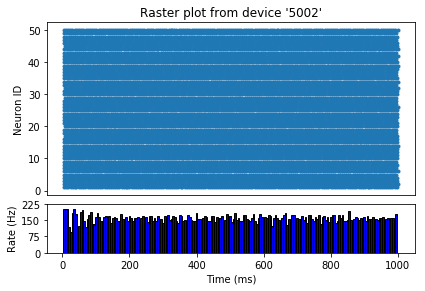

Simulate for external rate of 44000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.03 s
Simulation time   : 22.07 s
Ex Rate           : 160.44 Hz
In Rate           : 160.66 Hz


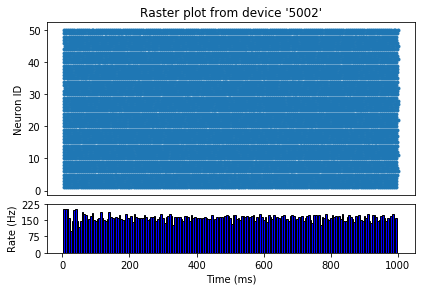

Simulate for external rate of 45000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.03 s
Simulation time   : 21.64 s
Ex Rate           : 163.38 Hz
In Rate           : 163.66 Hz


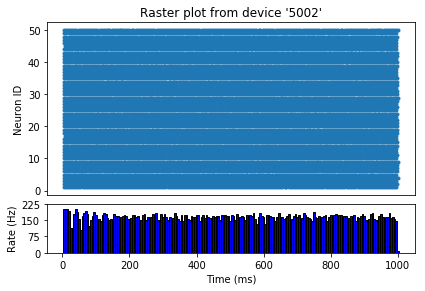

Simulate for external rate of 46000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.03 s
Simulation time   : 23.06 s
Ex Rate           : 166.50 Hz
In Rate           : 166.68 Hz


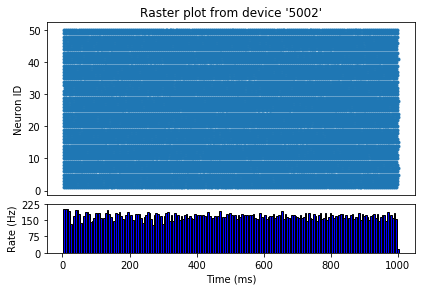

Simulate for external rate of 47000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.03 s
Simulation time   : 25.90 s
Ex Rate           : 169.38 Hz
In Rate           : 169.48 Hz


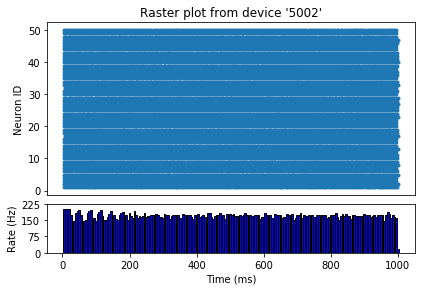

Simulate for external rate of 48000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.03 s
Simulation time   : 29.21 s
Ex Rate           : 172.24 Hz
In Rate           : 172.30 Hz


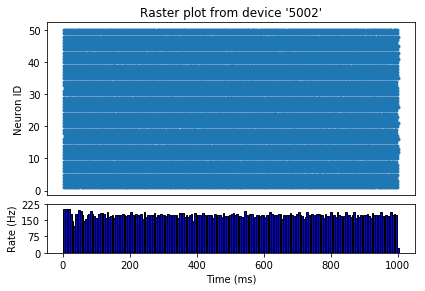

Simulate for external rate of 49000 Hz
Building network
Connecting network
Excitatory connections
Inhibitory connections
Simulating.
Brunel network simulation (Python)
Building time     : 0.07 s
Simulation time   : 26.83 s
Ex Rate           : 175.00 Hz
In Rate           : 175.14 Hz


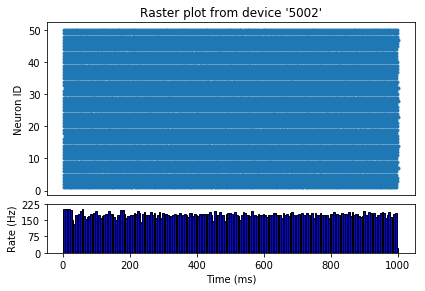

In [9]:
rates_ex = []
rates_in = []

for nu_ext in range(0, 50000, 1000):
    
    print("Simulate for external rate of {} Hz".format(nu_ext))
    
    nest.ResetKernel()
    
    nu_ext = float(nu_ext)

    startbuild = time.time()

    # Set time resolution of the simulation
    nest.SetKernelStatus({'resolution': dt, 'print_time': True})

    ### CREATE NETWORK NODES ###
    print('Building network')

    # Set neuron parameters
    nest.SetDefaults('iaf_psc_delta', neuron_params)

    # Create neurons
    nodes_ex=nest.Create('iaf_psc_delta', NE)
    nodes_in=nest.Create('iaf_psc_delta', NI)

    # Create poisson generator
    noise = nest.Create('poisson_generator',params={'rate':nu_ext})

    # Create spike detectors
    espikes=nest.Create('spike_detector')
    ispikes=nest.Create('spike_detector')
    nest.SetStatus(espikes,[{'withtime': True,
                            'withgid': True,
                            'to_file': False}])
    nest.SetStatus(ispikes,[{'withtime': True,
                             'withgid': True,
                             'to_file': False}])

    # Define synapse dictionaries
    syn_exc = {'weight': J, 'delay': d}
    syn_inh = {'weight': -g*J, 'delay': d}

    ### CONNECT NETWORK ###
    print('Connecting network')

    # Connect noise
    nest.Connect(noise,nodes_ex, 'all_to_all', syn_exc)
    nest.Connect(noise,nodes_in, 'all_to_all', syn_exc)

    # Connect spike detector
    nest.Connect(nodes_ex[:N_rec], espikes, 'all_to_all')
    nest.Connect(nodes_in[:N_rec], ispikes, 'all_to_all')                  

    # Connect excitatory neurons
    print('Excitatory connections')
    conn_exc = {'rule': 'fixed_indegree', 'indegree': CE}
    #nest.Connect(nodes_ex, nodes_ex, conn_exc, syn_exc)
    #nest.Connect(nodes_ex, nodes_in, conn_exc, syn_exc)

    # Connect inhibitry neurons
    print('Inhibitory connections')
    conn_inh = {'rule': 'fixed_indegree', 'indegree': CI}
    #nest.Connect(nodes_in, nodes_ex, conn_inh, syn_inh)
    #nest.Connect(nodes_in, nodes_in, conn_inh, syn_inh)

    endbuild=time.time()

    ### SIMULATE ###
    print('Simulating.')

    nest.Simulate(simtime)

    endsimulate= time.time()

    ### NETWORK EVALUATION ###

    build_time = endbuild-startbuild
    sim_time   = endsimulate-endbuild
    events_ex = nest.GetStatus(espikes,'n_events')[0]
    rate_ex   = events_ex/simtime*1000.0/N_rec
    rates_ex.append(rate_ex)
    events_in = nest.GetStatus(ispikes,'n_events')[0]
    rate_in   = events_in/simtime*1000.0/N_rec
    rates_in.append(rate_in)
    
    print('Brunel network simulation (Python)')
    print('Building time     : %.2f s' % build_time)
    print('Simulation time   : %.2f s' % sim_time)
    print('Ex Rate           : %.2f Hz' % rate_ex)
    print('In Rate           : %.2f Hz' % rate_in)

    if rate_ex > 0:
        # Show raster plot 
        nest.raster_plot.from_device(espikes, hist=True)
        plt.show()

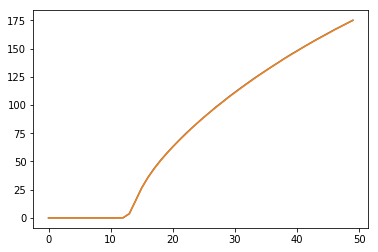

In [10]:
plt.plot(rates_in)
plt.plot(rates_ex)